In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [20]:
import os
import numpy as np
from skimage.io import imread
from skimage import data, img_as_float
from skimage import exposure

import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
path = "data/"
img = imread(path + "HF_normalize_staining_is001.jpg")
img.shape

(1536, 2048, 3)

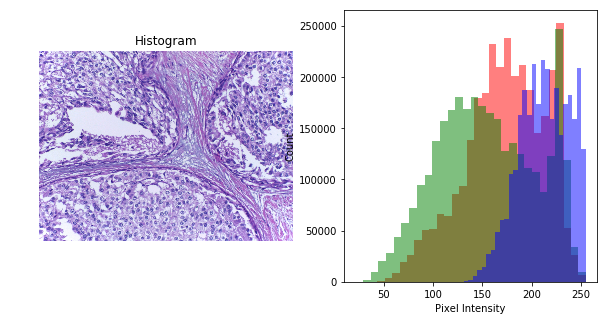

In [14]:
def plotHistogram(a):
    """
    Plot histogram of RGB Pixel Intensities
    """
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(a)
    plt.axis('off')
    plt.title('Histogram')
    histo = plt.subplot(1, 2, 2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:, :, 0].flatten(), bins=n_bins, lw=0, color='r', alpha=0.5)
    plt.hist(a[:, :, 1].flatten(), bins=n_bins, lw=0, color='g', alpha=0.5)
    plt.hist(a[:, :, 2].flatten(), bins=n_bins, lw=0, color='b', alpha=0.5)

plotHistogram(img)

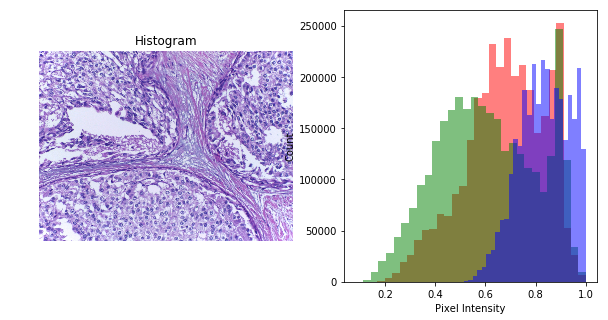

In [27]:
X=np.array(img)
X=X/255.0
plotHistogram(X)

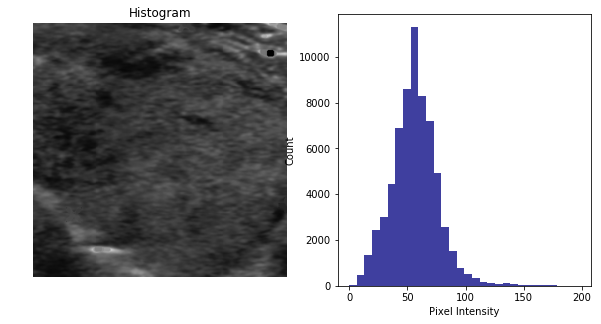

In [32]:
img_gray_path = "data_reduced/train/benign/76_5.png"
img_gray = imread(img_gray_path)
plotHistogram(img_gray)

___

In [15]:
def plot_img_and_hist(img, axes, bins=256):
#     """Plot an image along with its histogram and cumulative histogram.

    img = img_as_float(img)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(img, cmap=plt.cm.gray)
    ax_img.set_axis_off()
    ax_img.set_adjustable('box-forced')

    # Display histogram
    ax_hist.hist(img.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(img, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

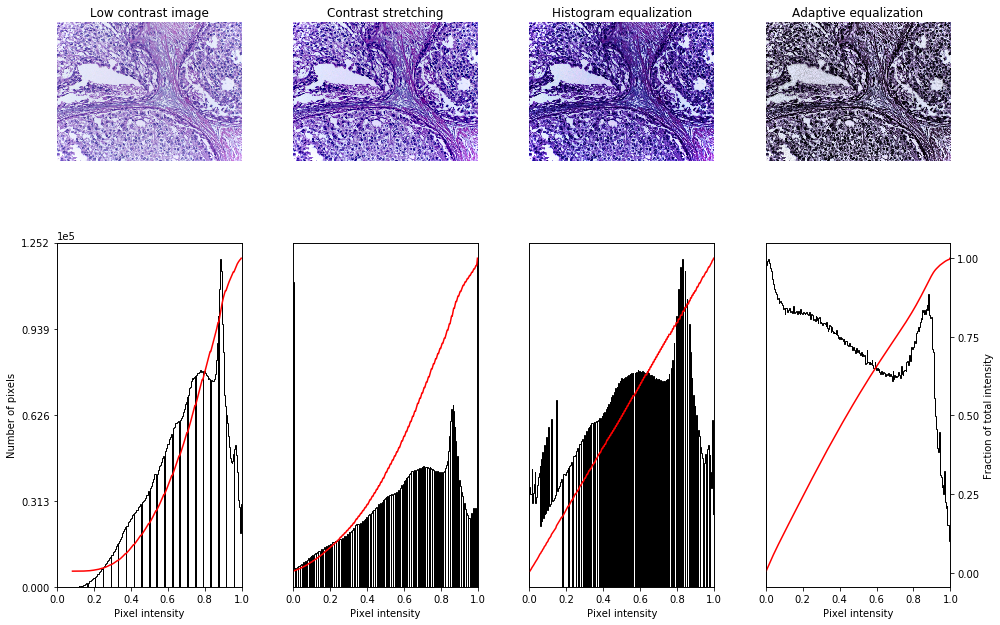

In [26]:
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

################################################################################
fig = plt.figure(figsize=(14, 10)) 

axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)

for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
    
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)
    
ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')

ax_hist.set_yticks(np.linspace(0, y_max, 5))
ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')
ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

____